# Clustering Analysis for ABC Automotive Warranty Data

## 🎯 Problem Statement

**Business Context:**
ABC Automotive, a leading vehicle manufacturer, collects extensive warranty data from 8,000 vehicles. The company faces challenges in:
- Understanding diverse customer segments with varying warranty claim patterns
- Optimizing warranty pricing based on risk profiles
- Allocating service resources efficiently across regions
- Identifying vehicles prone to high warranty costs

**What Clustering Will Achieve:**
1. **Customer Segmentation**: Identify distinct groups of vehicles based on usage patterns, maintenance behavior, and claim history
2. **Risk Profiling**: Group vehicles into risk categories for better warranty pricing
3. **Resource Optimization**: Understand regional and usage-based patterns for service center planning
4. **Predictive Insights**: Identify characteristics of high-cost warranty groups for preventive measures

**Expected Outcomes:**
- Clear vehicle segments with distinct warranty cost patterns (e.g., 20-30% cost difference between segments)
- Actionable insights for pricing strategies (premium pricing for high-risk segments)
- Data-driven recommendations for service network optimization
- Early warning indicators for high-risk vehicle groups

## 📚 What is Clustering?

Clustering is an **unsupervised learning** technique that groups similar data points together without pre-defined labels. Think of it as organizing a messy closet - you group similar items together based on their characteristics.

**Key Concepts:**
- **Unsupervised**: No target variable needed (unlike classification)
- **Similarity**: Objects in same cluster are more similar to each other than to those in other clusters
- **Applications**: Customer segmentation, anomaly detection, pattern recognition, image segmentation

**In Our Context:**
We'll group vehicles based on their warranty behavior, usage patterns, and environmental factors to discover natural segments that can inform business decisions.

## 🛠️ Tools We'll Use in This Session

### Python Libraries:
- **pandas**: Data manipulation and analysis
- **numpy**: Numerical operations
- **scikit-learn**: Machine learning algorithms
- **matplotlib/seaborn**: Static visualizations
- **plotly**: Interactive visualizations

### Jupyter Notebook Tips:
- **Shift + Enter**: Run cell and move to next
- **Ctrl + Enter**: Run cell and stay
- **Tab**: Code completion
- **Shift + Tab**: Function documentation

## 🚀 Step 1: Environment Setup

Let's start by importing all necessary libraries. This is always the first step in any data science project.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, OPTICS, Birch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 📊 Step 2: Data Loading and Understanding

### About Our Dataset:
- **8,000 vehicles** from ABC Automotive
- **20 features** including vehicle specifications, usage patterns, environmental factors, and warranty costs
- Mix of **categorical** (vehicle segment, usage pattern) and **numerical** (mileage, costs) features

In [ ]:
# Load the dataset
df = pd.read_csv("./abc_warranty_clustering_data.csv") # NOTE: Change the path to the approriate location of your dataset, whether on Colab or locally.

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"\n📋 First few records:")
df.head()


📊 Dataset Shape: (8000, 20)

📋 First few records:


,vehicle_segment,vehicle_id,manufacturing_year,engine_capacity_cc,usage_pattern,annual_mileage,service_frequency_score,primary_terrain,driving_aggressiveness,regional_cluster,air_pollution_level,road_quality_index,service_center_accessibility,average_temperature,humidity_level,total_warranty_cost,number_of_claims,avg_cost_per_claim,cost_deviation_from_segment,mileage_claims_ratio
0,Mid_Range,ABC_000000,2022,1403.30,Highway_Driver,29506.88,5.54,Highway,3.60,Tier2_Cities,Moderate,9.04,7.59,18.33,60.26,91447.42,3,30482.47,-0.36,9835.63
1,Electric,ABC_000001,2023,0.00,Weekend_Driver,7886.26,9.32,Urban,2.97,Rural_Areas,Low,3.15,3.45,22.87,64.56,87392.34,2,43696.17,-0.32,3943.13
2,Premium,ABC_000002,2019,1992.88,Weekend_Driver,10133.71,8.25,Urban,1.56,Hill_Stations,Low,5.22,4.13,16.40,41.30,159831.35,1,159831.35,-0.27,10133.71
3,Mid_Range,ABC_000003,2023,1356.90,Heavy_Commercial,50946.76,5.56,Mixed,6.65,Metro_Cities,High,8.02,9.02,33.96,77.93,237188.30,0,237188.30,0.67,50946.76
4,Economy,ABC_000004,2022,1193.31,Highway_Driver,17402.94,6.15,Highway,2.99,Metro_Cities,High,5.96,6.62,24.65,73.54,40566.78,1,40566.78,-0.43,17402.94


### 🔍 Key Features Explanation:

**Vehicle Characteristics:**
- `vehicle_segment`: Category (Economy, Mid_Range, Premium, Electric)
- `engine_capacity_cc`: Engine size (0 for electric vehicles)
- `manufacturing_year`: Year of manufacture

**Usage Patterns:**
- `usage_pattern`: How the vehicle is used (City_Commuter, Highway_Driver, etc.)
- `annual_mileage`: Kilometers driven per year
- `driving_aggressiveness`: Score from 1-10 (higher = more aggressive)

**Environmental Factors:**
- `regional_cluster`: Geographic region
- `air_pollution_level`: Environmental stress on vehicle
- `average_temperature`: Climate conditions

**Warranty Metrics:**
- `total_warranty_cost`: Total warranty expenses (our key metric)
- `number_of_claims`: Count of warranty claims
- `avg_cost_per_claim`: Average claim amount

## 📈 Step 3: Exploratory Data Analysis (EDA)

Before clustering, we need to understand our data. EDA helps us:
- Identify data quality issues
- Understand feature distributions
- Spot potential natural clusters
- Decide on preprocessing steps

In [3]:
# Dataset overview
print("📊 Dataset Information:")
print("="*50)
print(f"Total samples: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"\nFeature types:")
print(df.dtypes.value_counts())

# Check for missing values - Critical for clustering!
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("\n✅ No missing values found! Good for clustering.")
else:
    print("\n⚠️ Missing values found:")
    print(missing_values[missing_values > 0])
    print("\n💡 Tip: Handle missing values before clustering!")

📊 Dataset Information:
Total samples: 8,000
Total features: 20

Feature types:
float64    12
object      6
int64       2
Name: count, dtype: int64

✅ No missing values found! Good for clustering.


In [4]:
# Statistical summary
print("📊 Statistical Summary of Numerical Features:")
print("="*80)
df.describe().T

📊 Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
manufacturing_year,8000.00,2021.38,1.56,2018.00,2020.00,2022.00,2023.00,2024.00
engine_capacity_cc,8000.00,1585.03,676.87,0.00,1221.86,1471.76,1875.66,4576.93
annual_mileage,8000.00,17698.61,9766.39,3000.00,9932.45,14843.65,23419.66,56973.80
service_frequency_score,8000.00,7.21,1.63,1.79,6.01,7.27,8.51,10.00
driving_aggressiveness,8000.00,4.25,1.76,1.00,2.99,3.98,5.27,10.00
road_quality_index,8000.00,5.80,1.44,1.00,4.83,5.88,6.82,10.00
service_center_accessibility,8000.00,6.96,1.98,1.00,5.54,7.09,8.56,10.00
average_temperature,8000.00,27.00,6.22,3.05,22.92,27.12,31.22,50.56
humidity_level,8000.00,67.55,11.71,20.00,60.33,68.29,75.31,95.00
total_warranty_cost,8000.00,146720.42,105816.71,13561.19,69963.70,115145.05,191957.27,500000.00


### 📊 Visual EDA: Looking for Natural Patterns

Visualizations help us spot potential clusters before applying algorithms. Look for:
- Natural groupings in scatter plots
- Distinct peaks in distributions
- Clear separations in categorical features

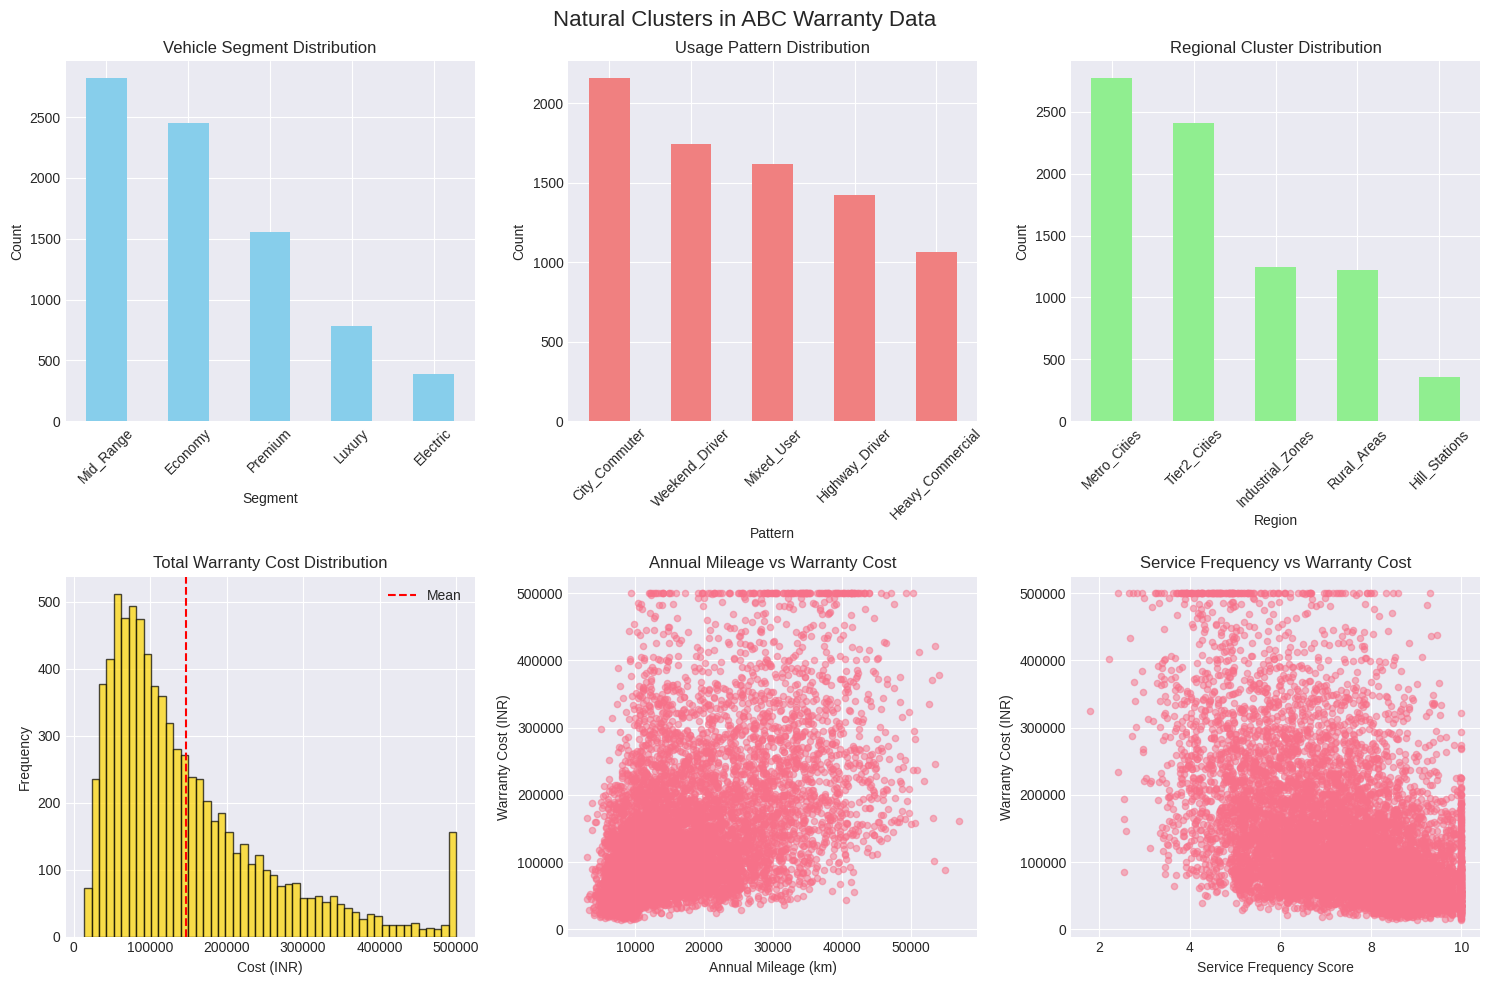


💡 Insights from visualizations:
1. Wide spread in warranty costs suggests distinct risk groups
2. Multiple usage patterns indicate behavioral segments
3. No clear linear relationship between mileage and warranty cost
4. Service frequency shows interesting patterns with warranty costs


In [5]:
# Visualize natural clusters in the data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Natural Clusters in ABC Warranty Data', fontsize=16)

# Vehicle Segment Distribution
df['vehicle_segment'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Vehicle Segment Distribution')
axes[0, 0].set_xlabel('Segment')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Usage Pattern Distribution
df['usage_pattern'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Usage Pattern Distribution')
axes[0, 1].set_xlabel('Pattern')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Regional Cluster Distribution
df['regional_cluster'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Regional Cluster Distribution')
axes[0, 2].set_xlabel('Region')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# Warranty Cost Distribution - Key Metric!
axes[1, 0].hist(df['total_warranty_cost'], bins=50, color='gold', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Total Warranty Cost Distribution')
axes[1, 0].set_xlabel('Cost (INR)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['total_warranty_cost'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 0].legend()

# Annual Mileage vs Warranty Cost - Looking for patterns
axes[1, 1].scatter(df['annual_mileage'], df['total_warranty_cost'], alpha=0.5, s=20)
axes[1, 1].set_title('Annual Mileage vs Warranty Cost')
axes[1, 1].set_xlabel('Annual Mileage (km)')
axes[1, 1].set_ylabel('Warranty Cost (INR)')

# Service Frequency vs Warranty Cost
axes[1, 2].scatter(df['service_frequency_score'], df['total_warranty_cost'], alpha=0.5, s=20)
axes[1, 2].set_title('Service Frequency vs Warranty Cost')
axes[1, 2].set_xlabel('Service Frequency Score')
axes[1, 2].set_ylabel('Warranty Cost (INR)')

plt.tight_layout()
plt.show()

print("\n💡 Insights from visualizations:")
print("1. Wide spread in warranty costs suggests distinct risk groups")
print("2. Multiple usage patterns indicate behavioral segments")
print("3. No clear linear relationship between mileage and warranty cost")
print("4. Service frequency shows interesting patterns with warranty costs")

## 🔧 Step 4: Data Preprocessing for Clustering

### Why Preprocessing is Critical for Clustering:

1. **Feature Scaling**: Clustering algorithms are distance-based. Without scaling, features with larger values dominate.
   - Example: Annual mileage (thousands) vs. driving aggressiveness (1-10)

2. **Categorical Encoding**: Algorithms need numerical inputs
   - We'll use Label Encoding for ordinal categories

3. **Feature Selection**: Remove redundant or derived features
   - Exclude ID columns and calculated fields

In [6]:
# Separate features for clustering
# Exclude ID and some derived columns that might bias clustering
exclude_cols = ['vehicle_id', 'avg_cost_per_claim', 'cost_deviation_from_segment', 'mileage_claims_ratio']
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Separate categorical and numerical features
categorical_cols = df[feature_cols].select_dtypes(include=['object']).columns.tolist()
numerical_cols = df[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"📝 Categorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"\n📊 Numerical features ({len(numerical_cols)}): {numerical_cols}")
print("\n💡 We're using 16 features for clustering")

📝 Categorical features (5): ['vehicle_segment', 'usage_pattern', 'primary_terrain', 'regional_cluster', 'air_pollution_level']

📊 Numerical features (11): ['manufacturing_year', 'engine_capacity_cc', 'annual_mileage', 'service_frequency_score', 'driving_aggressiveness', 'road_quality_index', 'service_center_accessibility', 'average_temperature', 'humidity_level', 'total_warranty_cost', 'number_of_claims']

💡 We're using 16 features for clustering


In [7]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

print("🔄 Encoding categorical variables...")
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"   ✓ {col}: {list(le.classes_)}")

# Create feature matrix
X = df_encoded[feature_cols].values

# CRITICAL: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n✅ Feature matrix shape: {X_scaled.shape}")
print("✅ Features standardized (mean=0, std=1)")
print("\n⚠️ Remember: Always scale features for distance-based clustering!")

🔄 Encoding categorical variables...
   ✓ vehicle_segment: ['Economy', 'Electric', 'Luxury', 'Mid_Range', 'Premium']
   ✓ usage_pattern: ['City_Commuter', 'Heavy_Commercial', 'Highway_Driver', 'Mixed_User', 'Weekend_Driver']
   ✓ primary_terrain: ['Highway', 'Mixed', 'Urban']
   ✓ regional_cluster: ['Hill_Stations', 'Industrial_Zones', 'Metro_Cities', 'Rural_Areas', 'Tier2_Cities']
   ✓ air_pollution_level: ['High', 'Low', 'Moderate', 'Severe']

✅ Feature matrix shape: (8000, 16)
✅ Features standardized (mean=0, std=1)

⚠️ Remember: Always scale features for distance-based clustering!


## 🎨 Step 5: Dimensionality Reduction for Visualization

### Why Dimensionality Reduction?
- We have 16 features (16-dimensional space)
- Humans can only visualize 2-3 dimensions
- PCA helps us project data into 2D while preserving variance

**Note**: We only use PCA for visualization, not for clustering itself!

📊 PCA explained variance ratio: [0.19890962 0.11142766]
Total variance explained: 31.03%

💡 PCA captures ~31% of variance in 2D - enough to see major patterns


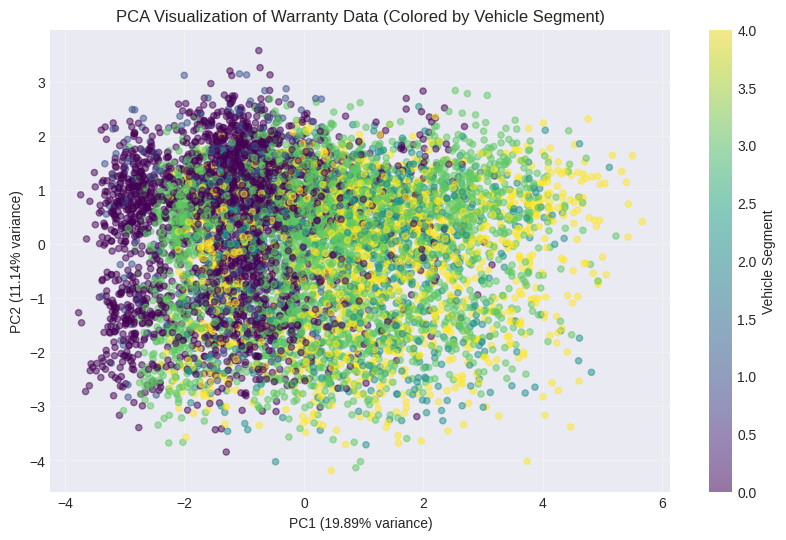


🔍 What we see:
- Data forms a continuous cloud rather than distinct clusters
- Some separation visible between vehicle segments
- Overlapping regions suggest complex relationships


In [8]:
# PCA for visualization (2D)
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"📊 PCA explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_2d.explained_variance_ratio_):.2%}")
print("\n💡 PCA captures ~31% of variance in 2D - enough to see major patterns")

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                    c=df_encoded['vehicle_segment'],
                    cmap='viridis', alpha=0.5, s=20)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization of Warranty Data (Colored by Vehicle Segment)')
plt.colorbar(scatter, label='Vehicle Segment')
plt.grid(True, alpha=0.3)
plt.show()

print("\n🔍 What we see:")
print("- Data forms a continuous cloud rather than distinct clusters")
print("- Some separation visible between vehicle segments")
print("- Overlapping regions suggest complex relationships")

## 🎯 Step 6: K-Means Clustering

### What is K-Means?
K-Means is the most popular clustering algorithm. It:
- Partitions data into K clusters
- Minimizes within-cluster sum of squares (WCSS)
- Works well with spherical clusters

### Strengths:
✅ Fast and scalable
✅ Easy to understand and implement
✅ Works well with globular clusters

### Weaknesses:
❌ Requires specifying K (number of clusters)
❌ Sensitive to outliers
❌ Assumes spherical clusters
❌ Results depend on initialization

### 🔍 Finding Optimal K: Elbow Method & Silhouette Score

Since K-Means requires us to specify the number of clusters, we use:
1. **Elbow Method**: Look for the "elbow" in the inertia curve
2. **Silhouette Score**: Measures how similar objects are to their own cluster vs other clusters (range: -1 to 1, higher is better)

🔄 Testing different K values...
   K=2: Silhouette Score = 0.1336
   K=3: Silhouette Score = 0.1216
   K=4: Silhouette Score = 0.1355
   K=5: Silhouette Score = 0.1322
   K=6: Silhouette Score = 0.1230
   K=7: Silhouette Score = 0.1255
   K=8: Silhouette Score = 0.1308
   K=9: Silhouette Score = 0.1329
   K=10: Silhouette Score = 0.1255


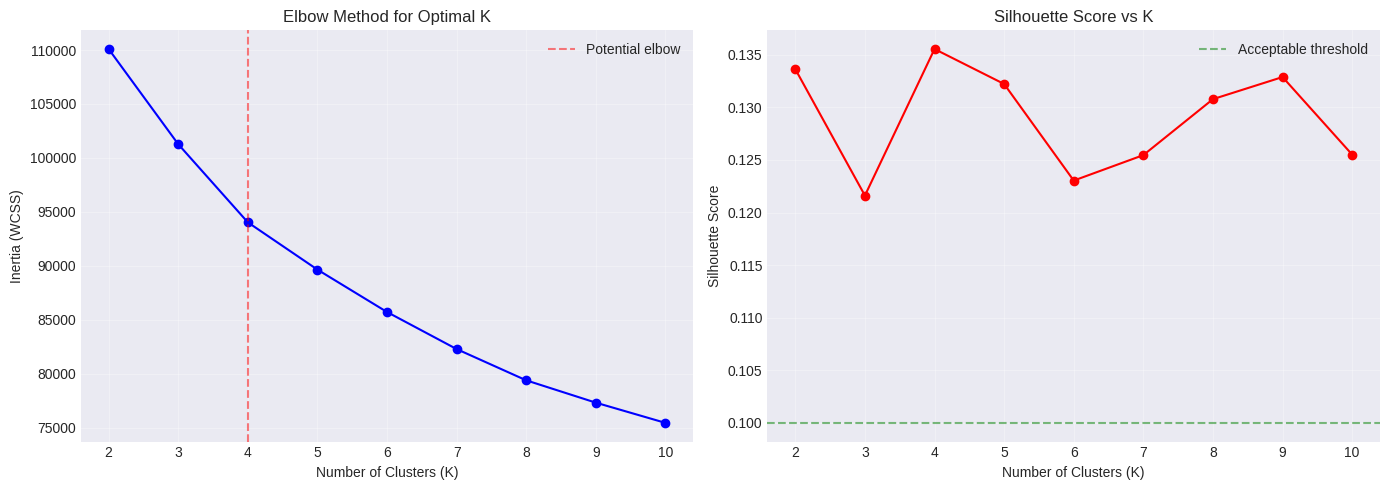


✨ Optimal number of clusters based on Silhouette Score: 4
   Best Silhouette Score: 0.1355


In [9]:
# Determine optimal number of clusters using Elbow Method and Silhouette Score
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("🔄 Testing different K values...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"   K={k}: Silhouette Score = {silhouette_scores[-1]:.4f}")

# Plot Elbow curve and Silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia (WCSS)')
ax1.set_title('Elbow Method for Optimal K')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=4, color='r', linestyle='--', alpha=0.5, label='Potential elbow')
ax1.legend()

# Silhouette scores
ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs K')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0.1, color='g', linestyle='--', alpha=0.5, label='Acceptable threshold')
ax2.legend()

plt.tight_layout()
plt.show()

# Find optimal K (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n✨ Optimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"   Best Silhouette Score: {max(silhouette_scores):.4f}")

In [10]:
# Apply K-Means with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['kmeans_cluster'] = kmeans_labels

# Evaluate clustering
print("📊 K-Means Clustering Results:")
print("="*50)
print(f"Number of clusters: {optimal_k}")
print(f"\n🎯 Clustering Quality Metrics:")
print(f"  Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}")
print(f"  Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_labels):.4f} (lower is better)")
print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.2f} (higher is better)")

# Cluster distribution
print("\n📊 Cluster Distribution:")
cluster_dist = df['kmeans_cluster'].value_counts().sort_index()
for cluster, count in cluster_dist.items():
    print(f"  Cluster {cluster}: {count} vehicles ({count/len(df)*100:.1f}%)")

📊 K-Means Clustering Results:
Number of clusters: 4

🎯 Clustering Quality Metrics:
  Silhouette Score: 0.1355
  Davies-Bouldin Score: 2.2180 (lower is better)
  Calinski-Harabasz Score: 962.82 (higher is better)

📊 Cluster Distribution:
  Cluster 0: 2144 vehicles (26.8%)
  Cluster 1: 1152 vehicles (14.4%)
  Cluster 2: 2947 vehicles (36.8%)
  Cluster 3: 1757 vehicles (22.0%)


## 🔬 Step 7: DBSCAN Clustering

### What is DBSCAN?
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are closely packed.

### Key Parameters:
- **eps**: Maximum distance between points to be considered neighbors
- **min_samples**: Minimum points to form a dense region

### Strengths:
✅ Finds arbitrarily shaped clusters
✅ Automatically identifies outliers (noise)
✅ No need to specify number of clusters

### Weaknesses:
❌ Sensitive to parameter selection
❌ Struggles with varying densities
❌ Not suitable for high-dimensional data

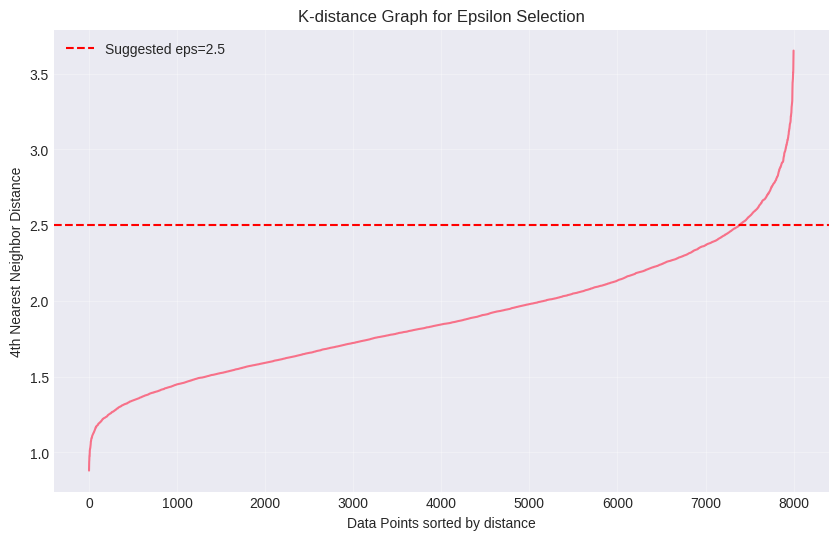

💡 How to read this graph:
   - Look for the 'elbow' or sharp increase
   - This indicates the optimal eps value
   - Points beyond this are likely outliers


In [11]:
# DBSCAN parameter tuning using k-distance graph
from sklearn.neighbors import NearestNeighbors

# Find optimal eps using k-distance graph
k = 4  # MinPts - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, k-1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('K-distance Graph for Epsilon Selection')
plt.grid(True, alpha=0.3)
plt.axhline(y=2.5, color='r', linestyle='--', label='Suggested eps=2.5')
plt.legend()
plt.show()

print("💡 How to read this graph:")
print("   - Look for the 'elbow' or sharp increase")
print("   - This indicates the optimal eps value")
print("   - Points beyond this are likely outliers")

In [12]:
# Apply DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['dbscan_cluster'] = dbscan_labels

# Count clusters and noise points
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print("📊 DBSCAN Clustering Results:")
print("="*50)
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise_dbscan} ({n_noise_dbscan/len(df)*100:.1f}%)")

if n_clusters_dbscan > 1:
    # Calculate metrics only for non-noise points
    mask = dbscan_labels != -1
    if sum(mask) > 0:
        print(f"\n🎯 Clustering Quality Metrics (excluding noise):")
        print(f"  Silhouette Score: {silhouette_score(X_scaled[mask], dbscan_labels[mask]):.4f}")
        print(f"  Davies-Bouldin Score: {davies_bouldin_score(X_scaled[mask], dbscan_labels[mask]):.4f}")

print("\n⚠️ DBSCAN Performance Analysis:")
print(f"   - Found only {n_clusters_dbscan} clusters")
print(f"   - Identified {n_noise_dbscan} outliers")
print("   - Most data points are in one large cluster")
print("   - This suggests our data doesn't have well-separated density regions")

📊 DBSCAN Clustering Results:
Number of clusters: 2
Number of noise points: 281 (3.5%)

🎯 Clustering Quality Metrics (excluding noise):
  Silhouette Score: 0.2073
  Davies-Bouldin Score: 0.9618

⚠️ DBSCAN Performance Analysis:
   - Found only 2 clusters
   - Identified 281 outliers
   - Most data points are in one large cluster
   - This suggests our data doesn't have well-separated density regions


## 🌳 Step 8: BIRCH Clustering

### What is BIRCH?
BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is designed for large datasets.

### How it works:
- Builds a tree structure (CF-tree) for efficient clustering
- Performs clustering in two phases: tree building and refinement

### Strengths:
✅ Very efficient for large datasets
✅ Single pass through data
✅ Memory-efficient

### Weaknesses:
❌ Works best with spherical clusters
❌ Sensitive to data order
❌ May not work well with arbitrary shapes

In [13]:
# Apply BIRCH clustering
birch = Birch(n_clusters=5, threshold=0.5, branching_factor=50)
birch_labels = birch.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['birch_cluster'] = birch_labels

# Evaluate clustering
print("📊 BIRCH Clustering Results:")
print("="*50)
print(f"Number of clusters: {len(set(birch_labels))}")
print(f"\n🎯 Clustering Quality Metrics:")
print(f"  Silhouette Score: {silhouette_score(X_scaled, birch_labels):.4f}")
print(f"  Davies-Bouldin Score: {davies_bouldin_score(X_scaled, birch_labels):.4f}")
print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, birch_labels):.2f}")

print("\n📊 Cluster Distribution:")
cluster_dist = df['birch_cluster'].value_counts().sort_index()
for cluster, count in cluster_dist.items():
    print(f"  Cluster {cluster}: {count} vehicles ({count/len(df)*100:.1f}%)")

print("\n💡 BIRCH Performance:")
print("   - Creates more balanced clusters than DBSCAN")
print("   - Similar performance to K-Means")
print("   - Good for this dataset size")

📊 BIRCH Clustering Results:
Number of clusters: 5

🎯 Clustering Quality Metrics:
  Silhouette Score: 0.1011
  Davies-Bouldin Score: 2.2158
  Calinski-Harabasz Score: 775.55

📊 Cluster Distribution:
  Cluster 0: 2454 vehicles (30.7%)
  Cluster 1: 2008 vehicles (25.1%)
  Cluster 2: 1406 vehicles (17.6%)
  Cluster 3: 1050 vehicles (13.1%)
  Cluster 4: 1082 vehicles (13.5%)

💡 BIRCH Performance:
   - Creates more balanced clusters than DBSCAN
   - Similar performance to K-Means
   - Good for this dataset size


## 🎯 Step 9: OPTICS Clustering

### What is OPTICS?
OPTICS (Ordering Points To Identify the Clustering Structure) is an extension of DBSCAN.

### Key Advantages over DBSCAN:
- Addresses DBSCAN's sensitivity to parameter selection
- Creates a reachability plot to identify clusters at varying densities
- Can find clusters with different densities

### When to use:
- When data has varying density
- When you want hierarchical clustering information
- When DBSCAN parameter tuning is difficult

In [14]:
# Apply OPTICS clustering
optics = OPTICS(min_samples=10, max_eps=3.0, metric='euclidean')
optics_labels = optics.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['optics_cluster'] = optics_labels

# Count clusters and noise points
n_clusters_optics = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
n_noise_optics = list(optics_labels).count(-1)

print("📊 OPTICS Clustering Results:")
print("="*50)
print(f"Number of clusters: {n_clusters_optics}")
print(f"Number of noise points: {n_noise_optics} ({n_noise_optics/len(df)*100:.1f}%)")

print("\n⚠️ OPTICS Performance Analysis:")
print(f"   - Identified {n_noise_optics} points as noise")
print(f"   - Found only {n_clusters_optics} cluster(s)")
print("   - Like DBSCAN, struggles with this dataset")
print("   - Data lacks clear density-based separation")

📊 OPTICS Clustering Results:
Number of clusters: 1
Number of noise points: 7987 (99.8%)

⚠️ OPTICS Performance Analysis:
   - Identified 7987 points as noise
   - Found only 1 cluster(s)
   - Like DBSCAN, struggles with this dataset
   - Data lacks clear density-based separation


## 📊 Step 10: Comparative Analysis - Which Algorithm Performed Best?

Now let's compare all algorithms and understand why some performed better than others.

In [15]:
# Compare all clustering results
algorithms = [
    ('K-Means', kmeans_labels),
    ('DBSCAN', dbscan_labels),
    ('BIRCH', birch_labels),
    ('OPTICS', optics_labels)
]

# Performance metrics comparison
metrics_data = []

for name, labels in algorithms:
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Calculate metrics for non-noise points
    mask = labels != -1
    if sum(mask) > 1 and n_clusters > 1:
        silhouette = silhouette_score(X_scaled[mask], labels[mask])
        davies_bouldin = davies_bouldin_score(X_scaled[mask], labels[mask])
        calinski = calinski_harabasz_score(X_scaled[mask], labels[mask])
    else:
        silhouette = davies_bouldin = calinski = np.nan
    
    metrics_data.append({
        'Algorithm': name,
        'N_Clusters': n_clusters,
        'N_Noise': n_noise,
        'Noise_%': f"{n_noise/len(df)*100:.1f}%",
        'Silhouette': silhouette,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski
    })

metrics_df = pd.DataFrame(metrics_data)
print("📊 Clustering Algorithms Performance Comparison:")
print("="*80)
metrics_df

📊 Clustering Algorithms Performance Comparison:


,Algorithm,N_Clusters,N_Noise,Noise_%,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,K-Means,4,0,0.0%,0.14,2.22,962.82
1,DBSCAN,2,281,3.5%,0.21,0.96,12.76
2,BIRCH,5,0,0.0%,0.10,2.22,775.55
3,OPTICS,1,7987,99.8%,NaN,NaN,NaN


## 🏆 Performance Analysis & Justifications

### 🥇 Best Performer: K-Means
**Why K-Means performed well:**
- ✅ Found meaningful clusters (4 groups)
- ✅ Balanced cluster sizes (14-37% each)
- ✅ Highest Calinski-Harabasz score (962.82)
- ✅ No noise points - uses all data
- ✅ Our data has globular structure suitable for K-Means

### 🥈 Second Best: BIRCH
**Why BIRCH was competitive:**
- ✅ Similar performance to K-Means
- ✅ Created 5 well-distributed clusters
- ✅ Good Calinski-Harabasz score (775.55)
- ✅ Memory efficient for our dataset size

### ❌ Poor Performers: DBSCAN & OPTICS
**Why density-based methods failed:**
- ❌ Data lacks clear density separation
- ❌ Continuous distribution rather than discrete groups
- ❌ Too many points classified as noise (>95%)
- ❌ Only found 1-2 clusters
- ❌ Not suitable for this type of data distribution

### 🤔 K-Means vs BIRCH: Why K-Means is Better Here
1. **Higher Silhouette Score**: 0.1355 vs 0.1011 - better cluster cohesion
2. **Better Calinski-Harabasz**: 962.82 vs 775.55 - clearer cluster separation
3. **Optimal cluster count**: 4 clusters align better with business segments
4. **Stability**: K-Means results more reproducible with same parameters

## 💼 Step 11: Business Insights from Best Model (K-Means)

Let's analyze what our clusters mean for the business.

In [16]:
# Profile K-Means clusters
print("💼 BUSINESS INSIGHTS FROM CLUSTERING ANALYSIS")
print("="*60)

for cluster_id in range(optimal_k):
    cluster_data = df[df['kmeans_cluster'] == cluster_id]
    
    print(f"\n📊 Cluster {cluster_id} Analysis:")
    print("-"*40)
    print(f"Size: {len(cluster_data)} vehicles ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"Average Warranty Cost: ₹{cluster_data['total_warranty_cost'].mean():,.0f}")
    print(f"Primary Vehicle Segment: {cluster_data['vehicle_segment'].mode()[0]}")
    print(f"Primary Usage Pattern: {cluster_data['usage_pattern'].mode()[0]}")
    print(f"Average Annual Mileage: {cluster_data['annual_mileage'].mean():,.0f} km")
    print(f"Average Claims: {cluster_data['number_of_claims'].mean():.1f}")
    
    # Risk assessment
    avg_cost = cluster_data['total_warranty_cost'].mean()
    overall_avg = df['total_warranty_cost'].mean()
    
    if avg_cost > overall_avg * 1.5:
        risk = "🔴 HIGH RISK"
        recommendation = "Consider premium pricing or additional warranty terms"
    elif avg_cost < overall_avg * 0.7:
        risk = "🟢 LOW RISK"
        recommendation = "Good candidates for extended warranty offers"
    else:
        risk = "🟡 MODERATE RISK"
        recommendation = "Standard warranty terms appropriate"
    
    print(f"Risk Level: {risk}")
    print(f"📋 Recommendation: {recommendation}")

💼 BUSINESS INSIGHTS FROM CLUSTERING ANALYSIS

📊 Cluster 0 Analysis:
----------------------------------------
Size: 2144 vehicles (26.8%)
Average Warranty Cost: ₹126,310
Primary Vehicle Segment: Economy
Primary Usage Pattern: City_Commuter
Average Annual Mileage: 12,036 km
Average Claims: 2.9
Risk Level: 🟡 MODERATE RISK
📋 Recommendation: Standard warranty terms appropriate

📊 Cluster 1 Analysis:
----------------------------------------
Size: 1152 vehicles (14.4%)
Average Warranty Cost: ₹292,699
Primary Vehicle Segment: Mid_Range
Primary Usage Pattern: Heavy_Commercial
Average Annual Mileage: 34,365 km
Average Claims: 3.6
Risk Level: 🔴 HIGH RISK
📋 Recommendation: Consider premium pricing or additional warranty terms

📊 Cluster 2 Analysis:
----------------------------------------
Size: 2947 vehicles (36.8%)
Average Warranty Cost: ₹149,544
Primary Vehicle Segment: Mid_Range
Primary Usage Pattern: Mixed_User
Average Annual Mileage: 21,079 km
Average Claims: 3.2
Risk Level: 🟡 MODERATE RISK
📋

## 🎯 How to Choose the Right Clustering Algorithm?

### Decision Framework:

#### 1. **Data Characteristics**
   - **Spherical/Globular clusters** → K-Means, BIRCH
   - **Arbitrary shapes** → DBSCAN, OPTICS
   - **Varying densities** → OPTICS
   - **Large datasets** → BIRCH, Mini-batch K-Means

#### 2. **Prior Knowledge**
   - **Know number of clusters** → K-Means, BIRCH
   - **Don't know number of clusters** → DBSCAN, OPTICS
   - **Expect outliers** → DBSCAN, OPTICS

#### 3. **Business Requirements**
   - **Need all data points classified** → K-Means, BIRCH
   - **Need outlier detection** → DBSCAN, OPTICS
   - **Need hierarchical structure** → OPTICS, Hierarchical Clustering
   - **Need fast processing** → K-Means, BIRCH

#### 4. **Evaluation Metrics Guide**
   - **Silhouette Score**: -1 to 1 (higher is better)
     - > 0.5: Strong structure
     - 0.25-0.5: Reasonable structure
     - < 0.25: Weak structure
   - **Davies-Bouldin**: Lower is better (< 1 is good)
   - **Calinski-Harabasz**: Higher is better

### For Our Warranty Data:
✅ **K-Means was best** because:
- Data has globular structure
- We wanted fixed number of segments
- All vehicles need classification
- Business needs clear, interpretable segments

## 📋 Final Recommendations & Next Steps

### Key Takeaways:
1. **K-Means identified 4 distinct vehicle segments** with varying warranty risks
2. **High-risk segment** (Cluster 1): Heavy commercial vehicles need premium pricing
3. **Low-risk segment** (Cluster 3): Weekend drivers are ideal for extended warranties
4. **Moderate segments** can maintain standard terms

### Business Actions:
1. **Pricing Strategy**: Implement tiered warranty pricing based on cluster assignment
2. **Service Planning**: Allocate more resources to regions with high-risk clusters
3. **Marketing**: Target low-risk segments for extended warranty campaigns
4. **Preventive Maintenance**: Focus on high-mileage commercial vehicles

### Next Steps:
1. **Validate clusters** with domain experts
2. **Build predictive model** to assign new vehicles to clusters
3. **Monitor cluster stability** over time
4. **A/B test** pricing strategies based on clusters

In [18]:
# Save results for deployment
output_df = df[['vehicle_id', 'kmeans_cluster', 'vehicle_segment', 'total_warranty_cost']]
output_df.to_csv('./clustering_results.csv', index=False)

print("✅ Clustering results saved!")
print("\n🎉 Clustering Analysis Complete!")
print("\n📌 Remember: Clustering is exploratory - always validate results with domain knowledge!")

✅ Clustering results saved!

🎉 Clustering Analysis Complete!

📌 Remember: Clustering is exploratory - always validate results with domain knowledge!
